<a href="https://colab.research.google.com/github/LifelessPROgrammer/SEM3ML/blob/colabs/8B%5DImplement_the_non_parametric_Locally_Weighted_Regression_algorithm_in_order_to_fit_data_points_Select_appropriate_data_set_for_your_experiment_and_draw_graphs_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Generate some random data for demonstration
np.random.seed(0)
X = np.random.rand(100, 1)
y = np.sin(2 * np.pi * X) + np.random.randn(100, 1) * 0.1

In [14]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
# Initialize the LWR model
lwr = LinearRegression(fit_intercept=True)

In [16]:
# Define the bandwidth parameter
bandwidth = 0.2

In [22]:
# Fit the model to the training data and make predictions on the test set
predictions = []
for x in X_test:
    weights = np.exp(-((X_train - x) ** 2) / (2 * bandwidth ** 2))
    lwr = LinearRegression(fit_intercept=True)
    lwr.fit(X_train, y_train, sample_weight=weights.flatten())  # Flatten the weights array
    prediction = lwr.predict([x])[0]  # Extract the scalar prediction
    predictions.append(prediction)

In [23]:
# Calculate the test MSE
test_mse = mean_squared_error(y_test, predictions)
print("Test MSE: ", test_mse)

Test MSE:  0.0846513129710471


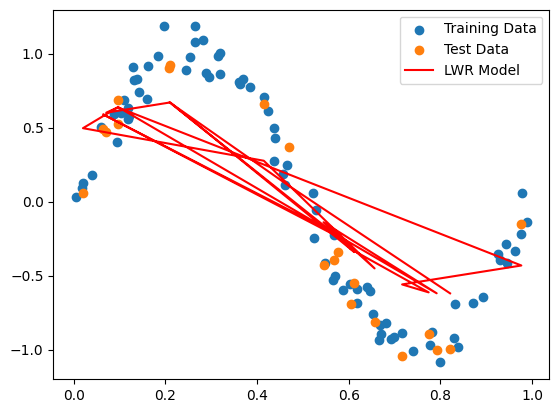

In [24]:
# Plot the data points and the LWR model
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, label='Test Data')
plt.plot(X_test, predictions, color='r', label='LWR Model')
plt.legend()
plt.show()